In [1]:
pip install pillow

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install scikit-image

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [5]:
from skimage.feature import hog
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from scipy.ndimage.measurements import label
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from PIL import Image
from skimage import exposure
%matplotlib inline
from IPython.display import HTML
import numpy as np
import pickle
import cv2
import glob
import time
import os, os.path

In [6]:
# Get fishplate and non-fishplate images

# path joining version for other paths
fishplate_images = 'C:/Users/shrey/Desktop/Mod1-IITR/fishplate/pos'
print("Fishplate images:")
print (len([name for name in os.listdir(fishplate_images) if os.path.isfile(os.path.join(fishplate_images, name))]))
# print(fishplate_images)
fishplate_images1 = []
# for i in [name for name in os.listdir(fishplate_images) if os.path.isfile(os.path.join(fishplate_images, name))]:
#     fishplate_images.append(fishplate_images+i)
for i in range(len([name for name in os.listdir(fishplate_images) if os.path.isfile(os.path.join(fishplate_images, name))])):
    fishplate_images1.append(fishplate_images+"/"+str(i+1)+".JPG")
print(fishplate_images1)

nonfishplate_images = 'C:/Users/shrey/Desktop/Mod1-IITR/fishplate/neg'
print("Non-fishplate images:")
print (len([name for name in os.listdir(nonfishplate_images) if os.path.isfile(os.path.join(nonfishplate_images, name))]))
print(nonfishplate_images)
nonfishplate_images1 = []
for i in range(len([name for name in os.listdir(nonfishplate_images) if os.path.isfile(os.path.join(nonfishplate_images, name))])):
    nonfishplate_images1.append(nonfishplate_images+"/"+str(i+1)+".JPG")
print(nonfishplate_images1)

Fishplate images:
10
['C:/Users/shrey/Desktop/Mod1-IITR/fishplate/pos/1.JPG', 'C:/Users/shrey/Desktop/Mod1-IITR/fishplate/pos/2.JPG', 'C:/Users/shrey/Desktop/Mod1-IITR/fishplate/pos/3.JPG', 'C:/Users/shrey/Desktop/Mod1-IITR/fishplate/pos/4.JPG', 'C:/Users/shrey/Desktop/Mod1-IITR/fishplate/pos/5.JPG', 'C:/Users/shrey/Desktop/Mod1-IITR/fishplate/pos/6.JPG', 'C:/Users/shrey/Desktop/Mod1-IITR/fishplate/pos/7.JPG', 'C:/Users/shrey/Desktop/Mod1-IITR/fishplate/pos/8.JPG', 'C:/Users/shrey/Desktop/Mod1-IITR/fishplate/pos/9.JPG', 'C:/Users/shrey/Desktop/Mod1-IITR/fishplate/pos/10.JPG']
Non-fishplate images:
10
C:/Users/shrey/Desktop/Mod1-IITR/fishplate/neg
['C:/Users/shrey/Desktop/Mod1-IITR/fishplate/neg/1.JPG', 'C:/Users/shrey/Desktop/Mod1-IITR/fishplate/neg/2.JPG', 'C:/Users/shrey/Desktop/Mod1-IITR/fishplate/neg/3.JPG', 'C:/Users/shrey/Desktop/Mod1-IITR/fishplate/neg/4.JPG', 'C:/Users/shrey/Desktop/Mod1-IITR/fishplate/neg/5.JPG', 'C:/Users/shrey/Desktop/Mod1-IITR/fishplate/neg/6.JPG', 'C:/User

Fishplate and not-fishplate sample images from the training set:


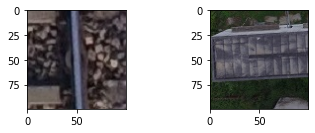

In [7]:
# Get sample images from training set
fishplate_img    = mpimg.imread('C:/Users/shrey/Desktop/Mod1-IITR/fishplate/pos/1.JPG')
not_fishplate_img = mpimg.imread('C:/Users/shrey/Desktop/Mod1-IITR/fishplate/neg/1.JPG')

# Plot sample images from training set
print("Fishplate and not-fishplate sample images from the training set:")
fig = plt.figure()
fig.add_subplot(2,2,1)
plt.imshow(fishplate_img.squeeze(), cmap="gray")
fig.add_subplot(2,2,2)
plt.imshow(not_fishplate_img.squeeze(), cmap="gray")

Text(0.5, 1.0, 'Histogram of Oriented Gradients')

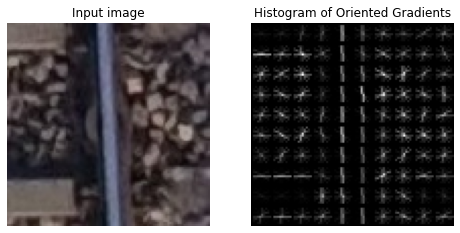

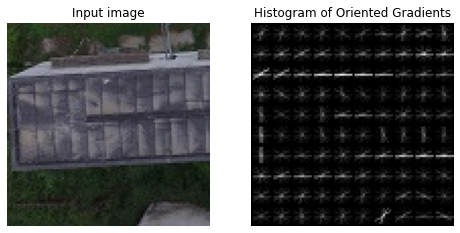

In [8]:
# Get Sample Images

fishplate_img  = 'C:/Users/shrey/Desktop/Mod1-IITR/fishplate/pos/1.JPG'
image1 = plt.imread(fishplate_img)

fd, hog_image = hog(image1, orientations=9, pixels_per_cell=(10, 10), cells_per_block=(2, 2), visualize=True, block_norm="L1", transform_sqrt=True)
# display the image
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(image1, cmap=plt.cm.gray)
ax1.set_title('Input image')

# Rescale histogram for better display
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))
# display the HOG features
ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')

non_fishplate_img  = 'C:/Users/shrey/Desktop/Mod1-IITR/fishplate/neg/1.JPG'
image2 = plt.imread(non_fishplate_img)

fd, hog_image = hog(image2, orientations=9, pixels_per_cell=(10, 10), cells_per_block=(2, 2), visualize=True, block_norm="L1", transform_sqrt=True)
# display the image
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(image2, cmap=plt.cm.gray)
ax1.set_title('Input image')

# Rescale histogram for better display
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))
# display the HOG features
ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')

In [9]:
def get_hog_features(img, orient, pix_per_cell, cell_per_block, 
                        vis=False, feature_vec=True):
    # Call with two outputs if vis==True
    if vis == True:
        features, hog_image = hog(img, orientations=orient, 
                                  pixels_per_cell=(pix_per_cell, pix_per_cell),
                                  cells_per_block=(cell_per_block, cell_per_block), 
                                  transform_sqrt=False, 
                                  visualize=vis, feature_vector=feature_vec)
        return features, hog_image
    # Otherwise call with one output
    else:      
        features = hog(img, orientations=orient, 
                       pixels_per_cell=(pix_per_cell, pix_per_cell),
                       cells_per_block=(cell_per_block, cell_per_block), 
                       transform_sqrt=False, 
                       visualize=vis, feature_vector=feature_vec)
        return features

def extract_features(imgs, orient=9, 
                        pix_per_cell=8, cell_per_block=2, hog_channel=0):
    # Create a list to append feature vectors to
    features = []
    # Iterate through the list of images
    for file in imgs:
        # Read in each one by one
        image = mpimg.imread(file)
        feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2YUV)
        
        hog_features = []
        for channel in range(feature_image.shape[2]):
            hog_features.append(get_hog_features(feature_image[:,:,channel], 
                                    orient, pix_per_cell, cell_per_block, 
                                    vis=False, feature_vec=True))
        hog_features = np.ravel(hog_features)        
        
        # Append the new feature vector to the features list
        features.append(hog_features)
    # Return list of feature vectors
    return features

print('...')

...


In [10]:
orient = 11
pix_per_cell = 16
cell_per_block = 2
fishplate_features = extract_features(fishplate_images1, orient=orient, 
                        pix_per_cell=pix_per_cell, cell_per_block=cell_per_block) 
                        

notfishplate_features = extract_features(nonfishplate_images1,orient=orient, 
                        pix_per_cell=pix_per_cell, cell_per_block=cell_per_block)

In [11]:
X = np.vstack((fishplate_features, notfishplate_features))
print(len(fishplate_features))
print(len(notfishplate_features))
# X = np.vstack((fishplate_features, notfishplate_features)).astype(np.float64)
print(X)
print(X.shape)


10
10
[[0.03479694 0.0074637  0.02725961 ... 0.0962434  0.         0.        ]
 [0.07037946 0.03537538 0.03640558 ... 0.1052362  0.02377044 0.        ]
 [0.22447143 0.12050488 0.05008271 ... 0.         0.         0.        ]
 ...
 [0.15648792 0.166533   0.07747629 ... 0.24580878 0.05150931 0.        ]
 [0.23372475 0.15384579 0.16123397 ... 0.18497091 0.04716275 0.03457296]
 [0.03527957 0.03090062 0.01684783 ... 0.05670976 0.03583706 0.00967723]]
(20, 3300)


In [12]:
y = np.hstack((np.ones(len(fishplate_features)), np.zeros(len(notfishplate_features))))
print(y)
print(y.shape)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
(20,)


In [13]:
# Split up data into randomized training and test sets
rand_state = np.random.randint(0, 4)
print(len(X))
print(len(y))
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=rand_state)

20
20


In [14]:
# Print feature details
print('Using',orient,'orientations with',pix_per_cell,
    'pixels per cell and', cell_per_block,'cells per block')
print('Feature vector length:', len(X_train[0]))


Using 11 orientations with 16 pixels per cell and 2 cells per block
Feature vector length: 3300


In [15]:
if __name__ == '__main__':
#        positive='E:/Ankush Sir Work/PH.D_2017/Code/training/sample_2.JPG'
    posfeatures=[]
    h1=[]
    positive= 'C:/Users/shrey/Desktop/Mod1-IITR/fishplate/pos'
    for image_file in os.listdir(positive):
        image = mpimg.imread(os.path.join(positive,image_file))
#        image = cv2.imread(os.path.join(positive,image_file))
#        image = cv2.imread(positive)
        gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
        gray=np.resize(gray,(100,100))
#        gray=gray.reshape((50,50))
        
#    one method for finding hog............. !!
        hogfeatures, hog_image = get_hog_features(gray, orient=9,pix_per_cell=16, cell_per_block=2,vis=True,feature_vec=True,)
        featuresize=hogfeatures.size
        hogfeatures=np.reshape(hogfeatures,(featuresize,),order='C')
        hogfeatures= hogfeatures.reshape(1,-1)
#        fig = plt.figure()
#        plt.subplot(121)
#        plt.imshow(image)
#        plt.title('Example positive Image')
#        plt.subplot(122)
#        plt.imshow(hog_image, cmap='gray')
#        plt.title('HOG Visualization')
#        plt.show()
        posfeatures.append(hogfeatures)
#        tpos=get_hogfeaturesmain(positive)
        tpos=np.concatenate(posfeatures)  
        h1.append(np.concatenate(posfeatures))

#for negative examples
    negfeatures=[]
    h2=[]
    negative= 'C:/Users/shrey/Desktop/Mod1-IITR/fishplate/neg/'
    for image_file1 in os.listdir(negative):
        image1 = mpimg.imread(os.path.join(negative,image_file1))
#        image1 = cv2.imread(os.path.join(negative,image_file1))
#        image = cv2.imread(positive)
        gray1 = cv2.cvtColor(image1, cv2.COLOR_RGB2GRAY)
        gray1=np.resize(gray1,(100,100))
#        gray=gray.reshape((50,50))
        
#    one method for finding hog............. !!
        hogfeatures1, hog_image1 = get_hog_features(gray1, orient=9,pix_per_cell=16, cell_per_block=2,vis=True,feature_vec=True,)
        featuresize1=hogfeatures1.size
        hogfeatures1=np.reshape(hogfeatures1,(featuresize1,),order='C')
        hogfeatures1= hogfeatures1.reshape(1,-1)
#        fig = plt.figure()
#        plt.subplot(121)
#        plt.imshow(image)
#        plt.title('Example positive Image')
#        plt.subplot(122)
#        plt.imshow(hog_image, cmap='gray')
#        plt.title('HOG Visualization')
#        plt.show()
        negfeatures.append(hogfeatures1)
#        tpos=get_hogfeaturesmain(positive)
        t=np.concatenate(negfeatures)  
        h2.append(np.concatenate(negfeatures))

In [16]:
svc = LinearSVC()
X_scaler = StandardScaler() 
#train1(tpos,t,svc,X_scaler)
#"""
X = np.vstack((tpos,t))
	# Fit a per-column scaler
X_scaler.fit(X)
	# Apply the scaler to X
scaled_X = X_scaler.transform(X)

	# Define the labels vector
y = np.hstack((np.ones(len(tpos)), np.zeros(len(t))))
rand_state = np.random.randint(0, 4)
X_train, X_test, y_train, y_test = train_test_split(
		scaled_X, y, test_size=0.20, random_state=rand_state)
    # Check the training time for the SVC
time1=time.time()
svm_model_linear=svc.fit(X_train, y_train)
#svc.fit(X_train, y_train)
t2 = time.time()

print(round(t2-time1, 15), 'Seconds to train SVC...')
svm_predictions = svm_model_linear.predict(X_test)
#svm_predictions = svc.predict(X_test)
print('Test Accuracy of SVC = ',svm_model_linear.score(X_test, y_test))  
#print('Test Accuracy of SVC = ',svc.score(X_test, y_test))  

0.002998113632202 Seconds to train SVC...
Test Accuracy of SVC =  1.0
